In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [72]:
with open(file=r"../data/australia-borders-coordinates.npy", mode="rb") as fp:
    border = np.load(fp)

# Sorghum site info
sorghum = pd.read_csv(r"../data/Emma Sumner/CSBP_soil_analysis_Themeda_and_Sorghum.csv", skiprows=range(1, 20)) # the preceeding rows are metadata and Themeda samples
sorghum = sorghum.rename(mapper= lambda name: name.strip().replace(' ', '_').replace('(', '').replace(')', '').replace('%', 'prcnt').lower(), axis=1)
# coordinate info of sample sites
geo = pd.read_csv(r"../data/Emma Sumner/field_sorghum_locations.csv")

In [73]:
sorghum

,lab_number,date_received,customer_sample_id,sample_name_1,sample_name_2,latitude,longitude,depth,colour,gravel_percent,...,ph_level_cacl2,ph_level_h2o,total_nitrogen,total_phosphorus,total_carbon,prcnt_clay,prcnt_course_sand,prcnt_fine_sand,prcnt_sand,prcnt_silt
0,2KGS24043,12/09/2024,S1,SB WA,Sorghum Bulbosum,-19.615600,147.961153,0-10,BROR,25-30,...,5.9,6.6,0.02,84.9,0.40,9.87,63.40,22.77,86.17,3.97
1,2KGS24044,12/09/2024,S2,SE WA,Sorghum Ecarinatum,-17.354575,123.741343,0-10,BROR,15-20,...,5.6,6.6,0.03,56.3,0.53,6.93,59.63,31.45,91.08,2.00
2,2KGS24045,12/09/2024,S3,SE NT,Sorghum Exstans,-12.434222,130.876718,0-10,BRGR,15-20,...,5.7,6.6,0.09,108.5,2.41,15.86,38.85,36.80,75.65,8.49
3,2KGS24046,12/09/2024,S4,SI WA,Sorghum Interjectum,-15.992228,128.974654,0-10,BROR,5-Oct,...,6.0,6.7,0.05,118.8,0.54,9.20,50.41,27.01,77.42,13.37
4,2KGS24047,12/09/2024,S5,SI NT,Sorghum Intrans,-14.407553,132.197353,0-10,BRRD,5,...,6.0,6.8,0.03,176.2,0.44,43.07,29.41,18.50,47.91,9.02
5,2KGS24048,12/09/2024,S6,SL NSW,Sorghum Leiocladum,-28.941111,152.428611,0-10,DKGR,5,...,6.0,6.5,0.22,237.2,3.89,14.71,18.75,46.50,65.25,20.04
6,2KGS24049,12/09/2024,S7,SM NT,Sorghum Macrospermum,-14.407640,132.197460,0-10,BR,5,...,6.1,6.8,0.22,684.7,3.65,25.68,4.38,30.35,34.73,39.58
7,2KGS24050,12/09/2024,S8,SP DW NT,Sorghum Plumosum,-16.062387,133.428109,0-10,GR,45-50,...,7.1,8.2,0.03,169.4,1.30,8.08,64.16,21.66,85.82,6.10
8,2KGS24051,12/09/2024,S9,SPT WA,Sorghum Plumosum var teretifolium,-15.992164,128.984524,0-10,BRGR,35-40,...,5.8,6.8,0.09,139.5,1.34,10.87,42.47,34.76,77.23,11.91
9,2KGS24052,12/09/2024,S10,SS NT,Sorghum Stipoideum,-12.511434,130.996383,0-10,GRBR,45-50,...,5.6,6.5,0.12,131.8,2.23,10.26,52.36,28.10,80.46,9.28


In [74]:
sorghum.columns

Index(['lab_number', 'date_received', 'customer_sample_id', 'sample_name_1',
       'sample_name_2', 'latitude', 'longitude', 'depth', 'colour',
       'gravel_percent', 'texture', 'ammonium_nitrogen', 'nitrate_nitrogen',
       'phosphorus_colwell', 'potassium_colwell', 'sulfur', 'organic_carbon',
       'conductivity', 'ph_level_cacl2', 'ph_level_h2o', 'total_nitrogen',
       'total_phosphorus', 'total_carbon', 'prcnt_clay', 'prcnt_course_sand',
       'prcnt_fine_sand', 'prcnt_sand', 'prcnt_silt'],
      dtype='object')

# ___Chemical properties___
-----------------

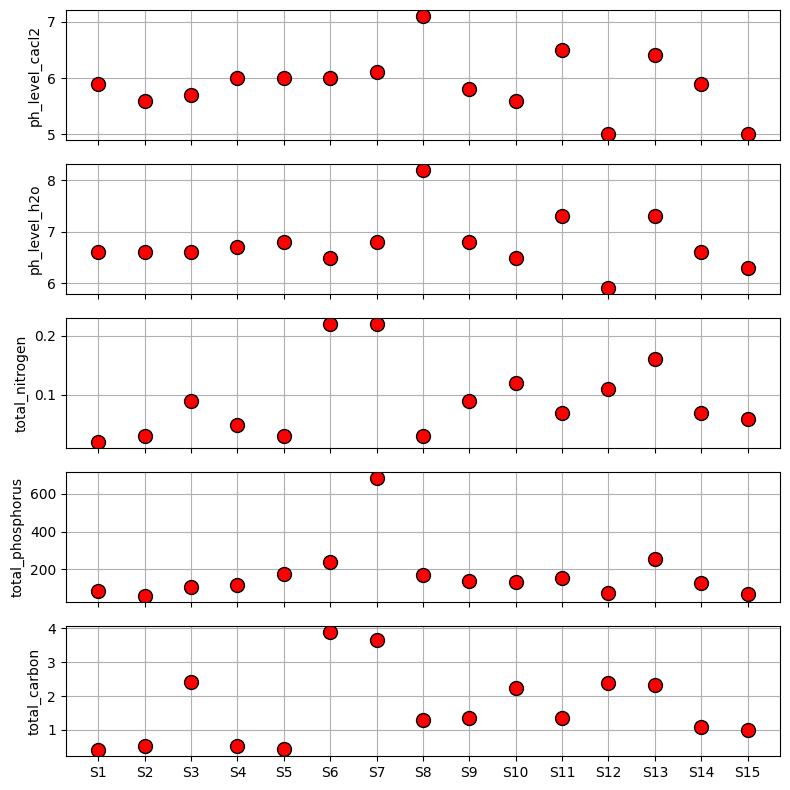

In [125]:
fig, axes = plt.subplots(nrows=5, sharex=True, sharey=False)
fig.set_size_inches(8, 8)

for (prop, axis) in zip(('ph_level_cacl2', 'ph_level_h2o', 'total_nitrogen', 'total_phosphorus', 'total_carbon'), axes):
    axis.plot(sorghum.customer_sample_id, sorghum[prop], linestyle="none", marker='o', mec="black", mfc="red", markersize=10)
    axis.set_ylabel(prop)
    axis.grid()
    
plt.tight_layout()
plt.show()

# ___Soil texture___
--------------

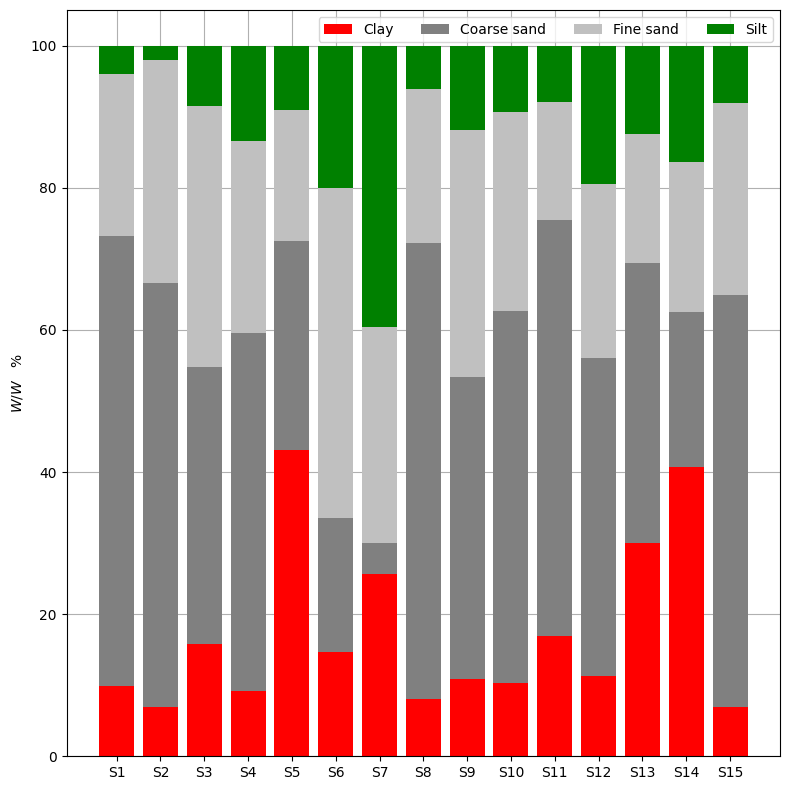

In [120]:
# Soil texture
fig, axes = plt.subplots()
fig.set_size_inches(8, 8)
axes.bar(x=sorghum.customer_sample_id, height=sorghum.prcnt_clay, color="red", label="Clay")
axes.bar(x=sorghum.customer_sample_id, height=sorghum.prcnt_course_sand, bottom=sorghum.prcnt_clay, color="grey", label="Coarse sand")
axes.bar(x=sorghum.customer_sample_id, height=sorghum.prcnt_fine_sand, bottom=sorghum.prcnt_clay+sorghum.prcnt_course_sand, color="silver", label="Fine sand")
axes.bar(x=sorghum.customer_sample_id, height=sorghum.prcnt_silt, bottom=sorghum.prcnt_clay+sorghum.prcnt_sand, color="green", label="Silt")
axes.legend(loc="upper right")
axes.set_ylabel(r"$W/W\hspace{1}\%$")
axes.set_axisbelow(True)
axes.grid()
axes.legend(loc="upper right", ncols=4)
plt.tight_layout()
plt.show()

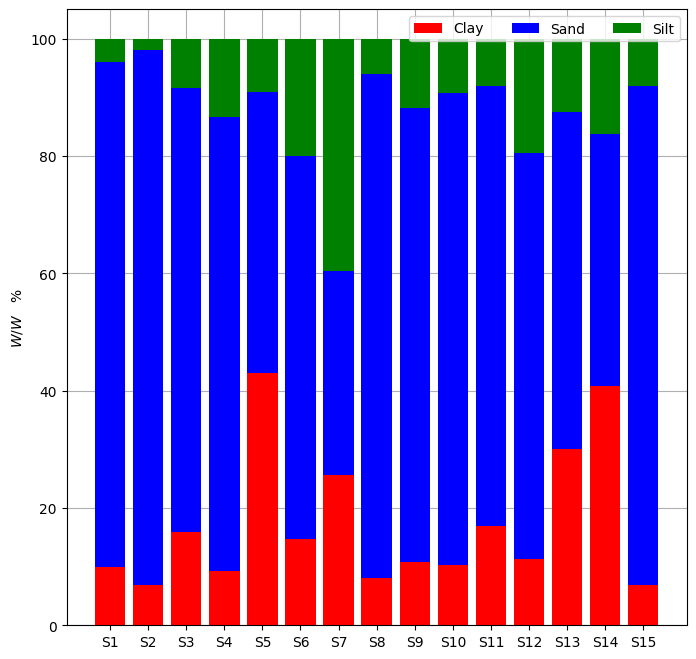

In [122]:
# without differentiating sand into coarse and fine sand
fig, axes = plt.subplots()
fig.set_size_inches(8, 8)
axes.bar(x=sorghum.customer_sample_id, height=sorghum.prcnt_clay, color="red", label="Clay")
axes.bar(x=sorghum.customer_sample_id, height=sorghum.prcnt_sand, bottom=sorghum.prcnt_clay, color="blue", label="Sand")
axes.bar(x=sorghum.customer_sample_id, height=sorghum.prcnt_silt, bottom=sorghum.prcnt_clay+sorghum.prcnt_sand, color="green", label="Silt")
axes.legend(loc="upper right", ncols=3)
axes.set_axisbelow(True)
axes.grid()
axes.set_ylabel(r"$W/W\hspace{1}\%$")
plt.show()

# ___Goegraphics___
-------------

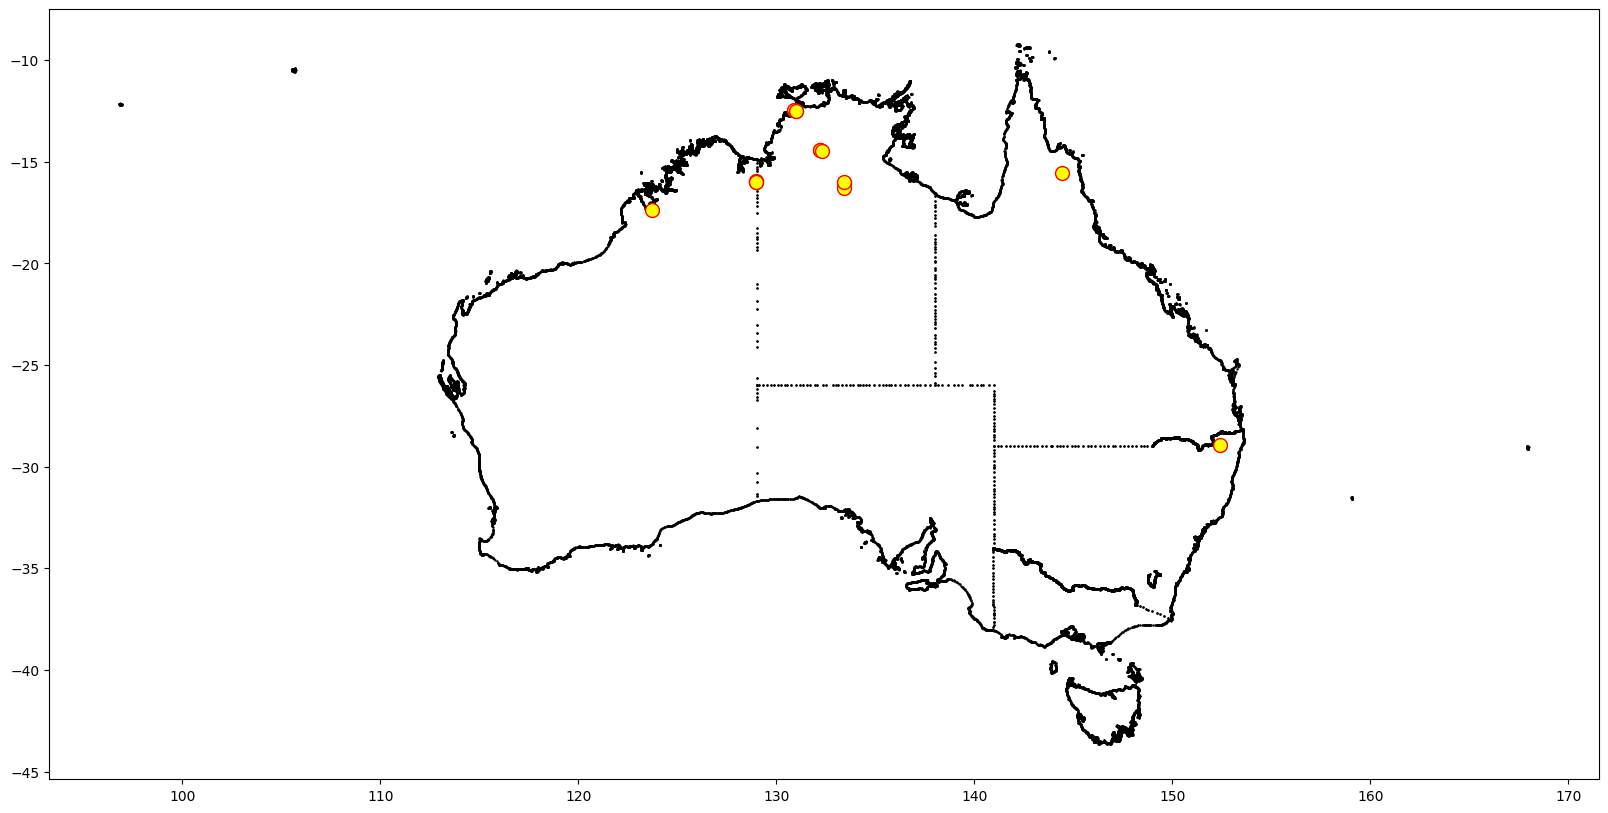

In [62]:
fig, axes = plt.subplots()
fig.set_size_inches(20, 10)
axes.scatter(border[:, 0], border[:, 1], color="black", s=0.5)
for (_, (species, lat, long)) in geo.loc[:, ["species_name", "latitude", "longitude"]].iterrows():
    axes.plot(long, lat, label=species, marker='o', markersize=10, markeredgecolor="red", markerfacecolor="yellow", linestyle="none")
    # axes.text(x=long+1.0, y=lat+1.0, s=species)
# axes.legend()
plt.show()